In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Srilanka_2018

In [5]:
Srilanka_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
19,19,MA Aponso (SL),3,2,0,4,4,2.00,33,12.12,...,119,3,2/27,39.66,6.43,37.0,0,0,0,0
50,50,PVD Chameera (SL),5,3,2,4,2*,4.00,11,36.36,...,137,8,3/20,17.12,3.51,29.2,0,0,1,0
51,51,LD Chandimal (SL),10,8,1,298,80,42.57,392,76.02,...,-,-,-,-,-,-,-,-,1,0
72,72,A Dananjaya (SL),16,12,3,161,37,17.88,191,84.29,...,644,28,6/29,23.00,5.22,26.3,1,1,10,0
78,78,DM de Silva (SL),10,9,2,222,84,31.71,261,85.05,...,217,6,2/38,36.16,5.29,41.0,0,0,8,0
79,79,PWH de Silva (SL),2,2,0,11,11,5.50,13,84.61,...,69,0,-,-,6.90,-,0,0,0,0
83,83,N Dickwella (SL),14,12,0,415,95,34.58,483,85.92,...,-,-,-,-,-,-,-,-,9,1
98,98,N Pradeep (SL),5,1,1,0,0*,-,5,0.00,...,190,7,3/28,27.14,5.42,30.0,0,0,0,0
104,104,DAS Gunaratne (SL),5,4,0,35,16,8.75,63,55.55,...,79,4,3/37,19.75,6.07,19.5,0,0,2,0
105,105,MD Gunathilaka (SL),2,2,1,41,35*,41.00,46,89.13,...,4,0,-,-,2.00,-,0,0,1,0


In [6]:
Srilanka_2018=Srilanka_2018.reset_index()

In [7]:
Srilanka_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,19,19,MA Aponso (SL),3,2,0,4,4,2.00,33,...,119,3,2/27,39.66,6.43,37.0,0,0,0,0
1,50,50,PVD Chameera (SL),5,3,2,4,2*,4.00,11,...,137,8,3/20,17.12,3.51,29.2,0,0,1,0
2,51,51,LD Chandimal (SL),10,8,1,298,80,42.57,392,...,-,-,-,-,-,-,-,-,1,0
3,72,72,A Dananjaya (SL),16,12,3,161,37,17.88,191,...,644,28,6/29,23.00,5.22,26.3,1,1,10,0
4,78,78,DM de Silva (SL),10,9,2,222,84,31.71,261,...,217,6,2/38,36.16,5.29,41.0,0,0,8,0
5,79,79,PWH de Silva (SL),2,2,0,11,11,5.50,13,...,69,0,-,-,6.90,-,0,0,0,0
6,83,83,N Dickwella (SL),14,12,0,415,95,34.58,483,...,-,-,-,-,-,-,-,-,9,1
7,98,98,N Pradeep (SL),5,1,1,0,0*,-,5,...,190,7,3/28,27.14,5.42,30.0,0,0,0,0
8,104,104,DAS Gunaratne (SL),5,4,0,35,16,8.75,63,...,79,4,3/37,19.75,6.07,19.5,0,0,2,0
9,105,105,MD Gunathilaka (SL),2,2,1,41,35*,41.00,46,...,4,0,-,-,2.00,-,0,0,1,0


In [8]:
Srilanka_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Srilanka_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MA Aponso (SL),3,2,0,4,4,2.00,33,12.12,0,...,119,3,2/27,39.66,6.43,37.0,0,0,0,0
1,PVD Chameera (SL),5,3,2,4,2*,4.00,11,36.36,0,...,137,8,3/20,17.12,3.51,29.2,0,0,1,0
2,LD Chandimal (SL),10,8,1,298,80,42.57,392,76.02,0,...,-,-,-,-,-,-,-,-,1,0
3,A Dananjaya (SL),16,12,3,161,37,17.88,191,84.29,0,...,644,28,6/29,23.00,5.22,26.3,1,1,10,0
4,DM de Silva (SL),10,9,2,222,84,31.71,261,85.05,0,...,217,6,2/38,36.16,5.29,41.0,0,0,8,0
5,PWH de Silva (SL),2,2,0,11,11,5.50,13,84.61,0,...,69,0,-,-,6.90,-,0,0,0,0
6,N Dickwella (SL),14,12,0,415,95,34.58,483,85.92,0,...,-,-,-,-,-,-,-,-,9,1
7,N Pradeep (SL),5,1,1,0,0*,-,5,0.00,0,...,190,7,3/28,27.14,5.42,30.0,0,0,0,0
8,DAS Gunaratne (SL),5,4,0,35,16,8.75,63,55.55,0,...,79,4,3/37,19.75,6.07,19.5,0,0,2,0
9,MD Gunathilaka (SL),2,2,1,41,35*,41.00,46,89.13,0,...,4,0,-,-,2.00,-,0,0,1,0


In [10]:
Srilanka_2018_players =Srilanka_2018.copy()

In [11]:
Srilanka_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
Srilanka_2018_players.HS=Srilanka_2018_players.HS.str.extract('(\d+)')
Srilanka_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
Srilanka_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,3,2,0,4,4,2.00,33,12.12,0,0,...,119,3,2/27,39.66,6.43,37.0,0,0,0,0
1,5,3,2,4,2,4.00,11,36.36,0,0,...,137,8,3/20,17.12,3.51,29.2,0,0,1,0
2,10,8,1,298,80,42.57,392,76.02,0,1,...,-,-,-,-,-,-,-,-,1,0
3,16,12,3,161,37,17.88,191,84.29,0,0,...,644,28,6/29,23.00,5.22,26.3,1,1,10,0
4,10,9,2,222,84,31.71,261,85.05,0,1,...,217,6,2/38,36.16,5.29,41.0,0,0,8,0
5,2,2,0,11,11,5.50,13,84.61,0,0,...,69,0,-,-,6.90,-,0,0,0,0
6,14,12,0,415,95,34.58,483,85.92,0,3,...,-,-,-,-,-,-,-,-,9,1
7,5,1,1,0,0,-,5,0.00,0,0,...,190,7,3/28,27.14,5.42,30.0,0,0,0,0
8,5,4,0,35,16,8.75,63,55.55,0,0,...,79,4,3/37,19.75,6.07,19.5,0,0,2,0
9,2,2,1,41,35,41.00,46,89.13,0,0,...,4,0,-,-,2.00,-,0,0,1,0


In [14]:
Srilanka_2018_players.replace("-",0,inplace=True)

In [15]:
Srilanka_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Srilanka_2018_players_scaled = pd.DataFrame(scaler.fit_transform(Srilanka_2018_players),columns=Srilanka_2018_players.columns)
Srilanka_2018_players_scaled.shape
Srilanka_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.844961,-0.794502,-0.873698,-0.850769,-0.996692,-1.137608,-0.714361,-1.822611,0.0,-0.682187,...,-0.475055,-0.065607,-0.215553,1.096866,0.827937,0.827181,-0.338062,-0.361158,-0.809587,-0.2
1,-0.441860,-0.579324,1.101619,-0.850769,-1.058761,-1.003240,-0.852828,-1.067981,0.0,-0.682187,...,2.818658,0.041750,0.484994,-0.083333,-0.221603,0.448080,-0.338062,-0.361158,-0.508883,-0.2
2,0.565891,0.496564,0.113961,1.200739,1.361947,1.588052,1.545160,0.166698,0.0,0.361158,...,-0.475055,-0.775351,-0.635881,-0.979740,-1.483208,-0.971120,-0.338062,-0.361158,-0.508883,-0.2
3,1.775194,1.357274,2.089277,0.244764,0.027454,-0.070724,0.280080,0.424156,0.0,-0.682187,...,-0.475055,3.065617,3.287180,0.224545,0.393025,0.307132,1.859339,2.768875,2.197450,-0.2
4,0.565891,0.711741,1.101619,0.670417,1.486085,0.858432,0.720655,0.447816,0.0,0.361158,...,-0.475055,0.518888,0.204775,0.913605,0.418185,1.021592,-0.338062,-0.361158,1.596042,-0.2


In [17]:
Srilanka_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,26.0,2.600000e+01,...,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,-8.540177e-17,-6.832142e-17,5.177482e-17,3.416071e-17,6.405133e-17,4.910602e-17,-2.562053e-17,1.184950e-16,0.0,-6.618637e-17,...,5.551115e-17,1.708035e-17,-8.540177e-18,7.686159e-17,2.476651e-16,3.843080e-17,-4.270089e-18,-4.697097e-17,-5.124106e-17,-3.202566e-17
std,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,0.0,1.019804e+00,...,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00
min,-1.248062e+00,-1.224857e+00,-8.736978e-01,-8.786809e-01,-1.120831e+00,-1.271977e+00,-9.220611e-01,-2.199926e+00,0.0,-6.821865e-01,...,-4.750548e-01,-7.753505e-01,-6.358807e-01,-9.797404e-01,-1.483208e+00,-9.711204e-01,-3.380617e-01,-3.611576e-01,-8.095868e-01,-2.000000e-01
25%,-8.449612e-01,-7.945017e-01,-8.736978e-01,-8.089017e-01,-9.035877e-01,-7.738063e-01,-8.402400e-01,-5.387442e-01,0.0,-6.821865e-01,...,-4.750548e-01,-7.693863e-01,-6.358807e-01,-9.797404e-01,-1.303492e+00,-9.711204e-01,-3.380617e-01,-3.611576e-01,-8.095868e-01,-2.000000e-01
50%,-3.410853e-01,-4.717354e-01,1.139606e-01,-6.135200e-01,-3.604802e-01,-3.508821e-01,-5.255434e-01,1.807069e-01,0.0,-6.821865e-01,...,-4.750548e-01,-3.339971e-01,-4.257168e-01,-1.447962e-02,4.056046e-01,2.280591e-02,-3.380617e-01,-3.611576e-01,-5.088831e-01,-2.000000e-01
75%,7.170543e-01,6.579467e-01,1.139606e-01,7.122844e-01,8.033217e-01,8.297112e-01,6.860386e-01,5.498498e-01,0.0,3.611576e-01,...,-4.750548e-01,2.833011e-01,1.697478e-01,8.984209e-01,6.859612e-01,5.780924e-01,-3.380617e-01,-3.611576e-01,6.187556e-01,-2.000000e-01
max,1.976744e+00,2.002806e+00,2.089277e+00,2.017155e+00,1.889537e+00,2.255191e+00,2.117908e+00,1.464574e+00,0.0,2.447846e+00,...,2.818658e+00,3.065617e+00,3.287180e+00,2.214233e+00,1.510857e+00,2.819894e+00,4.056740e+00,2.768875e+00,2.197450e+00,5.000000e+00


In [18]:
X =  Srilanka_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.84496124, -0.79450165, -0.87369775, -0.85076925, -0.99669188,
        -1.13760842, -0.71436132, -1.82261115,  0.        , -0.6821865 ,
         0.49526056, -0.76412703, -0.68680282, -1.66699568, -0.84496124,
        -0.15649105, -0.17106878, -0.47505477, -0.06560658, -0.21555279,
         1.09686619,  0.82793667,  0.82718146, -0.3380617 , -0.36115756,
        -0.80958675, -0.2       ],
       [-0.44186047, -0.57932412,  1.10161891, -0.85076925, -1.05876131,
        -1.00324013, -0.85282784, -1.06798131,  0.        , -0.6821865 ,
        -0.49526056, -0.76412703, -0.68680282, -1.2966543 , -0.44186047,
         0.32218746,  0.49658325,  2.81865828,  0.04174964,  0.48499377,
        -0.08333331, -0.22160335,  0.44807999, -0.3380617 , -0.36115756,
        -0.5088831 , -0.2       ],
       [ 0.56589147,  0.49656353,  0.11396058,  1.20073868,  1.36194663,
         1.58805225,  1.5451604 ,  0.16669771,  0.        ,  0.36115756,
        -0.49526056,  0.32823326,  0.5036554 , -1.2847

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Srilanka_2018_players_scaled))

False

In [23]:
Srilanka_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.844961,-0.794502,-0.873698,-0.850769,-0.996692,-1.137608,-0.714361,-1.822611,0.0,-0.682187,...,-0.475055,-0.065607,-0.215553,1.096866,0.827937,0.827181,-0.338062,-0.361158,-0.809587,-0.2
1,-0.441860,-0.579324,1.101619,-0.850769,-1.058761,-1.003240,-0.852828,-1.067981,0.0,-0.682187,...,2.818658,0.041750,0.484994,-0.083333,-0.221603,0.448080,-0.338062,-0.361158,-0.508883,-0.2
2,0.565891,0.496564,0.113961,1.200739,1.361947,1.588052,1.545160,0.166698,0.0,0.361158,...,-0.475055,-0.775351,-0.635881,-0.979740,-1.483208,-0.971120,-0.338062,-0.361158,-0.508883,-0.2
3,1.775194,1.357274,2.089277,0.244764,0.027454,-0.070724,0.280080,0.424156,0.0,-0.682187,...,-0.475055,3.065617,3.287180,0.224545,0.393025,0.307132,1.859339,2.768875,2.197450,-0.2
4,0.565891,0.711741,1.101619,0.670417,1.486085,0.858432,0.720655,0.447816,0.0,0.361158,...,-0.475055,0.518888,0.204775,0.913605,0.418185,1.021592,-0.338062,-0.361158,1.596042,-0.2
5,-1.046512,-0.794502,-0.873698,-0.801924,-0.779449,-0.902464,-0.840240,0.434118,0.0,-0.682187,...,-0.475055,-0.363818,-0.635881,-0.979740,0.996869,-0.971120,-0.338062,-0.361158,-0.809587,-0.2
6,1.372093,1.357274,-0.873698,2.017155,1.827467,1.051251,2.117908,0.474900,0.0,2.447846,...,-0.475055,-0.775351,-0.635881,-0.979740,-1.483208,-0.971120,-0.338062,-0.361158,1.896746,5.0
7,-0.441860,-1.009679,0.113961,-0.878681,-1.120831,-1.271977,-0.890591,-2.199926,0.0,-0.682187,...,1.171802,0.357854,0.344884,0.441316,0.464911,0.486962,-0.338062,-0.361158,-0.809587,-0.2
8,-0.441860,-0.364147,-0.873698,-0.634454,-0.624275,-0.684115,-0.525543,-0.470566,0.0,-0.682187,...,-0.475055,-0.304176,-0.075443,0.054374,0.698541,-0.023367,-0.338062,-0.361158,-0.208179,-0.2
9,-1.046512,-0.794502,0.113961,-0.592586,-0.034616,1.482573,-0.632540,0.574833,0.0,-0.682187,...,0.348373,-0.751494,-0.635881,-0.979740,-0.764345,-0.971120,-0.338062,-0.361158,-0.508883,-0.2


In [24]:
np.all(np.isfinite(Srilanka_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


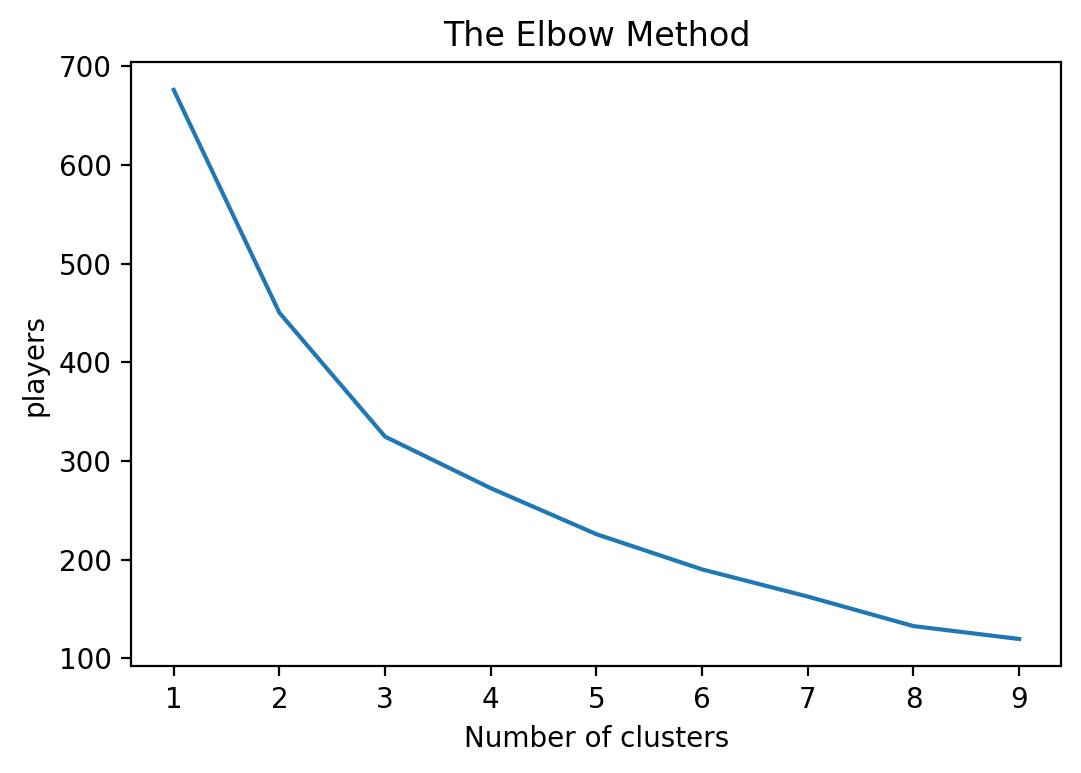

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0,
       0, 0, 2, 2])

In [28]:
kmeans.cluster_centers_

array([[-6.68604651e-01, -7.13810079e-01, -1.94682651e-01,
        -7.29964038e-01, -6.88284378e-01, -5.26358688e-01,
        -7.19868515e-01, -3.95247018e-01,  0.00000000e+00,
        -6.16977497e-01, -2.47630278e-01, -6.48917156e-01,
        -5.97518453e-01, -1.08724601e-01, -6.68604651e-01,
        -5.17801282e-02, -4.50776768e-02,  2.96909229e-01,
        -4.39862306e-02, -1.27984467e-01,  2.23301263e-01,
         3.85835906e-01,  2.46378568e-01, -2.00724135e-01,
        -1.65530548e-01, -5.65265037e-01, -2.00000000e-01],
       [ 1.87596899e+00,  1.68003995e+00,  2.08927724e+00,
         1.13095949e+00,  4.46422471e-01,  4.90263362e-01,
         8.08770310e-01,  9.11365442e-01,  0.00000000e+00,
         3.61157559e-01,  1.28102657e-17,  7.37868370e-01,
         1.45602198e+00, -3.62989687e-02,  1.87596899e+00,
         2.59591043e+00,  2.66403332e+00, -4.75054766e-01,
         2.68986983e+00,  3.07701603e+00,  1.64854160e-01,
         4.93665360e-01,  1.88055265e-01,  2.95803989e+

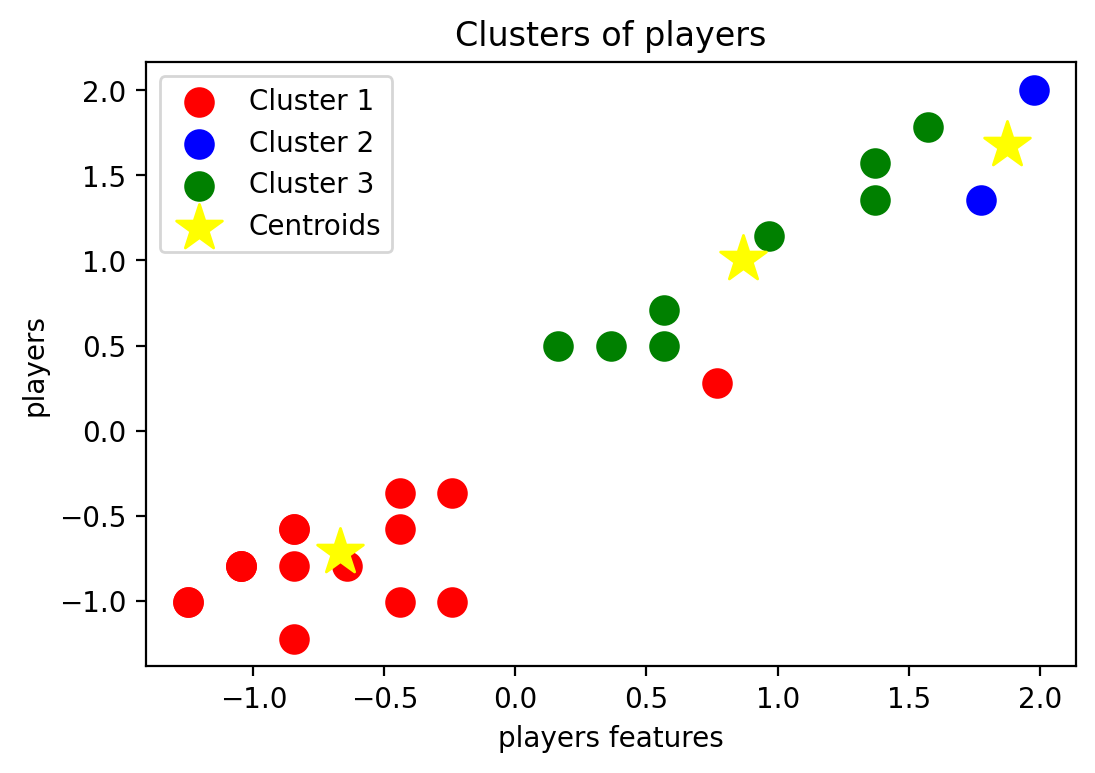

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Srilanka_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MA Aponso (SL),3,2,0,4,4,2.00,33,12.12,0,...,119,3,2/27,39.66,6.43,37.0,0,0,0,0
1,PVD Chameera (SL),5,3,2,4,2*,4.00,11,36.36,0,...,137,8,3/20,17.12,3.51,29.2,0,0,1,0
2,LD Chandimal (SL),10,8,1,298,80,42.57,392,76.02,0,...,-,-,-,-,-,-,-,-,1,0
3,A Dananjaya (SL),16,12,3,161,37,17.88,191,84.29,0,...,644,28,6/29,23.00,5.22,26.3,1,1,10,0
4,DM de Silva (SL),10,9,2,222,84,31.71,261,85.05,0,...,217,6,2/38,36.16,5.29,41.0,0,0,8,0
5,PWH de Silva (SL),2,2,0,11,11,5.50,13,84.61,0,...,69,0,-,-,6.90,-,0,0,0,0
6,N Dickwella (SL),14,12,0,415,95,34.58,483,85.92,0,...,-,-,-,-,-,-,-,-,9,1
7,N Pradeep (SL),5,1,1,0,0*,-,5,0.00,0,...,190,7,3/28,27.14,5.42,30.0,0,0,0,0
8,DAS Gunaratne (SL),5,4,0,35,16,8.75,63,55.55,0,...,79,4,3/37,19.75,6.07,19.5,0,0,2,0
9,MD Gunathilaka (SL),2,2,1,41,35*,41.00,46,89.13,0,...,4,0,-,-,2.00,-,0,0,1,0


In [31]:
Srilanka_2018["cluster"] = y_kmeans

In [32]:
Srilanka_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MA Aponso (SL),3,2,0,4,4,2.00,33,12.12,0,...,3,2/27,39.66,6.43,37.0,0,0,0,0,0
1,PVD Chameera (SL),5,3,2,4,2*,4.00,11,36.36,0,...,8,3/20,17.12,3.51,29.2,0,0,1,0,0
2,LD Chandimal (SL),10,8,1,298,80,42.57,392,76.02,0,...,-,-,-,-,-,-,-,1,0,2
3,A Dananjaya (SL),16,12,3,161,37,17.88,191,84.29,0,...,28,6/29,23.00,5.22,26.3,1,1,10,0,1
4,DM de Silva (SL),10,9,2,222,84,31.71,261,85.05,0,...,6,2/38,36.16,5.29,41.0,0,0,8,0,2
5,PWH de Silva (SL),2,2,0,11,11,5.50,13,84.61,0,...,0,-,-,6.90,-,0,0,0,0,0
6,N Dickwella (SL),14,12,0,415,95,34.58,483,85.92,0,...,-,-,-,-,-,-,-,9,1,2
7,N Pradeep (SL),5,1,1,0,0*,-,5,0.00,0,...,7,3/28,27.14,5.42,30.0,0,0,0,0,0
8,DAS Gunaratne (SL),5,4,0,35,16,8.75,63,55.55,0,...,4,3/37,19.75,6.07,19.5,0,0,2,0,0
9,MD Gunathilaka (SL),2,2,1,41,35*,41.00,46,89.13,0,...,0,-,-,2.00,-,0,0,1,0,0


In [33]:
Srilanka_2018['cluster'].value_counts()

0    16
2     8
1     2
Name: cluster, dtype: int64

In [34]:
SL_Cluster_2018 = np.array([16 ,2,8])

In [35]:
SL_Cluster_2018

array([16,  2,  8])

In [36]:
%store SL_Cluster_2018

Stored 'SL_Cluster_2018' (ndarray)


In [37]:
Srilanka_2018_players_scaled.insert(0, 'Player', Srilanka_2018.Player)

In [38]:
Srilanka_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MA Aponso (SL),-0.844961,-0.794502,-0.873698,-0.850769,-0.996692,-1.137608,-0.714361,-1.822611,0.0,...,-0.475055,-0.065607,-0.215553,1.096866,0.827937,0.827181,-0.338062,-0.361158,-0.809587,-0.2
1,PVD Chameera (SL),-0.441860,-0.579324,1.101619,-0.850769,-1.058761,-1.003240,-0.852828,-1.067981,0.0,...,2.818658,0.041750,0.484994,-0.083333,-0.221603,0.448080,-0.338062,-0.361158,-0.508883,-0.2
2,LD Chandimal (SL),0.565891,0.496564,0.113961,1.200739,1.361947,1.588052,1.545160,0.166698,0.0,...,-0.475055,-0.775351,-0.635881,-0.979740,-1.483208,-0.971120,-0.338062,-0.361158,-0.508883,-0.2
3,A Dananjaya (SL),1.775194,1.357274,2.089277,0.244764,0.027454,-0.070724,0.280080,0.424156,0.0,...,-0.475055,3.065617,3.287180,0.224545,0.393025,0.307132,1.859339,2.768875,2.197450,-0.2
4,DM de Silva (SL),0.565891,0.711741,1.101619,0.670417,1.486085,0.858432,0.720655,0.447816,0.0,...,-0.475055,0.518888,0.204775,0.913605,0.418185,1.021592,-0.338062,-0.361158,1.596042,-0.2
5,PWH de Silva (SL),-1.046512,-0.794502,-0.873698,-0.801924,-0.779449,-0.902464,-0.840240,0.434118,0.0,...,-0.475055,-0.363818,-0.635881,-0.979740,0.996869,-0.971120,-0.338062,-0.361158,-0.809587,-0.2
6,N Dickwella (SL),1.372093,1.357274,-0.873698,2.017155,1.827467,1.051251,2.117908,0.474900,0.0,...,-0.475055,-0.775351,-0.635881,-0.979740,-1.483208,-0.971120,-0.338062,-0.361158,1.896746,5.0
7,N Pradeep (SL),-0.441860,-1.009679,0.113961,-0.878681,-1.120831,-1.271977,-0.890591,-2.199926,0.0,...,1.171802,0.357854,0.344884,0.441316,0.464911,0.486962,-0.338062,-0.361158,-0.809587,-0.2
8,DAS Gunaratne (SL),-0.441860,-0.364147,-0.873698,-0.634454,-0.624275,-0.684115,-0.525543,-0.470566,0.0,...,-0.475055,-0.304176,-0.075443,0.054374,0.698541,-0.023367,-0.338062,-0.361158,-0.208179,-0.2
9,MD Gunathilaka (SL),-1.046512,-0.794502,0.113961,-0.592586,-0.034616,1.482573,-0.632540,0.574833,0.0,...,0.348373,-0.751494,-0.635881,-0.979740,-0.764345,-0.971120,-0.338062,-0.361158,-0.508883,-0.2


In [39]:
Srilanka_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MA Aponso (SL),-0.844961,-0.794502,-0.873698,-0.850769,-0.996692,-1.137608,-0.714361,-1.822611,0.0,...,-0.475055,-0.065607,-0.215553,1.096866,0.827937,0.827181,-0.338062,-0.361158,-0.809587,-0.2
1,PVD Chameera (SL),-0.441860,-0.579324,1.101619,-0.850769,-1.058761,-1.003240,-0.852828,-1.067981,0.0,...,2.818658,0.041750,0.484994,-0.083333,-0.221603,0.448080,-0.338062,-0.361158,-0.508883,-0.2
2,LD Chandimal (SL),0.565891,0.496564,0.113961,1.200739,1.361947,1.588052,1.545160,0.166698,0.0,...,-0.475055,-0.775351,-0.635881,-0.979740,-1.483208,-0.971120,-0.338062,-0.361158,-0.508883,-0.2
3,A Dananjaya (SL),1.775194,1.357274,2.089277,0.244764,0.027454,-0.070724,0.280080,0.424156,0.0,...,-0.475055,3.065617,3.287180,0.224545,0.393025,0.307132,1.859339,2.768875,2.197450,-0.2
4,DM de Silva (SL),0.565891,0.711741,1.101619,0.670417,1.486085,0.858432,0.720655,0.447816,0.0,...,-0.475055,0.518888,0.204775,0.913605,0.418185,1.021592,-0.338062,-0.361158,1.596042,-0.2
5,PWH de Silva (SL),-1.046512,-0.794502,-0.873698,-0.801924,-0.779449,-0.902464,-0.840240,0.434118,0.0,...,-0.475055,-0.363818,-0.635881,-0.979740,0.996869,-0.971120,-0.338062,-0.361158,-0.809587,-0.2
6,N Dickwella (SL),1.372093,1.357274,-0.873698,2.017155,1.827467,1.051251,2.117908,0.474900,0.0,...,-0.475055,-0.775351,-0.635881,-0.979740,-1.483208,-0.971120,-0.338062,-0.361158,1.896746,5.0
7,N Pradeep (SL),-0.441860,-1.009679,0.113961,-0.878681,-1.120831,-1.271977,-0.890591,-2.199926,0.0,...,1.171802,0.357854,0.344884,0.441316,0.464911,0.486962,-0.338062,-0.361158,-0.809587,-0.2
8,DAS Gunaratne (SL),-0.441860,-0.364147,-0.873698,-0.634454,-0.624275,-0.684115,-0.525543,-0.470566,0.0,...,-0.475055,-0.304176,-0.075443,0.054374,0.698541,-0.023367,-0.338062,-0.361158,-0.208179,-0.2
9,MD Gunathilaka (SL),-1.046512,-0.794502,0.113961,-0.592586,-0.034616,1.482573,-0.632540,0.574833,0.0,...,0.348373,-0.751494,-0.635881,-0.979740,-0.764345,-0.971120,-0.338062,-0.361158,-0.508883,-0.2


In [40]:
Srilanka_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MA Aponso (SL),-1.137608,1.096866
1,PVD Chameera (SL),-1.003240,-0.083333
2,LD Chandimal (SL),1.588052,-0.979740
3,A Dananjaya (SL),-0.070724,0.224545
4,DM de Silva (SL),0.858432,0.913605
5,PWH de Silva (SL),-0.902464,-0.979740
6,N Dickwella (SL),1.051251,-0.979740
7,N Pradeep (SL),-1.271977,0.441316
8,DAS Gunaratne (SL),-0.684115,0.054374
9,MD Gunathilaka (SL),1.482573,-0.979740


In [41]:
SL_2018_Ave=Srilanka_2018_players_scaled.mean()

In [42]:
SL_2018_Ave

Mat_x          -8.540177e-17
Inns_x         -6.832142e-17
NO              5.177482e-17
Runs_x          3.416071e-17
HS              6.405133e-17
Ave_x           4.910602e-17
BF             -2.562053e-17
SR_x            1.184950e-16
100             0.000000e+00
50             -6.618637e-17
0               1.281027e-17
4s              8.540177e-18
6s              4.270089e-18
Unnamed: 0_y    0.000000e+00
Mat_y          -8.540177e-17
Inns_y          2.562053e-17
Overs           5.124106e-17
Mdns            5.551115e-17
Runs_y          1.708035e-17
Wkts           -8.540177e-18
Ave_y           7.686159e-17
Econ            2.476651e-16
SR_y            3.843080e-17
4              -4.270089e-18
5              -4.697097e-17
Ct             -5.124106e-17
St             -3.202566e-17
dtype: float64

In [43]:
SL_Ave_2018 =SL_2018_Ave[['Ave_x','Ave_y']]

In [44]:
SL_Ave_2018

Ave_x    4.910602e-17
Ave_y    7.686159e-17
dtype: float64

In [45]:
SL_Ave_2018 = np.array([SL_Ave_2018.Ave_x, SL_Ave_2018.Ave_y])

In [46]:
SL_Ave_2018

array([4.91060184e-17, 7.68615940e-17])

In [47]:
%store SL_Ave_2018

Stored 'SL_Ave_2018' (ndarray)


In [48]:
Srilanka_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MA Aponso (SL),3,2,0,4,4,2.00,33,12.12,0,...,3,2/27,39.66,6.43,37.0,0,0,0,0,0
1,PVD Chameera (SL),5,3,2,4,2*,4.00,11,36.36,0,...,8,3/20,17.12,3.51,29.2,0,0,1,0,0
2,LD Chandimal (SL),10,8,1,298,80,42.57,392,76.02,0,...,-,-,-,-,-,-,-,1,0,2
3,A Dananjaya (SL),16,12,3,161,37,17.88,191,84.29,0,...,28,6/29,23.00,5.22,26.3,1,1,10,0,1
4,DM de Silva (SL),10,9,2,222,84,31.71,261,85.05,0,...,6,2/38,36.16,5.29,41.0,0,0,8,0,2
5,PWH de Silva (SL),2,2,0,11,11,5.50,13,84.61,0,...,0,-,-,6.90,-,0,0,0,0,0
6,N Dickwella (SL),14,12,0,415,95,34.58,483,85.92,0,...,-,-,-,-,-,-,-,9,1,2
7,N Pradeep (SL),5,1,1,0,0*,-,5,0.00,0,...,7,3/28,27.14,5.42,30.0,0,0,0,0,0
8,DAS Gunaratne (SL),5,4,0,35,16,8.75,63,55.55,0,...,4,3/37,19.75,6.07,19.5,0,0,2,0,0
9,MD Gunathilaka (SL),2,2,1,41,35*,41.00,46,89.13,0,...,0,-,-,2.00,-,0,0,1,0,0
